In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,8

In [2]:
df_train = pd.read_csv('H:/all/train.csv')
df_test = pd.read_csv('H:/all/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

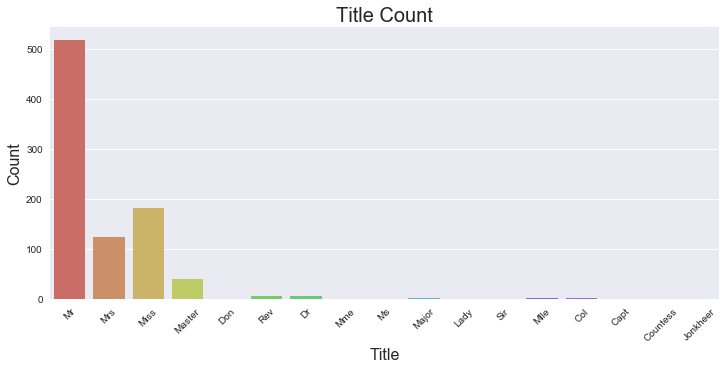

In [7]:
df_train['Title'] = df_train.Name.apply(lambda x :re.search('([A-Z][a-z]+)\.',x).group(1))
plt.figure(figsize=(12,5))
sns.countplot(x = 'Title' , data = df_train , palette='hls')
plt.xlabel('Title',fontsize =16)
plt.ylabel('Count', fontsize=16)
plt.title('Title Count',fontsize=20)
plt.xticks(rotation=45)
plt.show()

In [8]:
df_test['Title'] =  df_test.Name.apply(lambda x :re.search('([A-Z][a-z]+)\.',x).group(1))

In [9]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

In [10]:
print('Chances to survive based on titles')
print(df_train.groupby('Title')['Survived'].mean())

Chances to survive based on titles
Title
Master     0.575000
Miss       0.701087
Mr         0.156673
Mrs        0.795276
Officer    0.277778
Royalty    0.500000
Name: Survived, dtype: float64


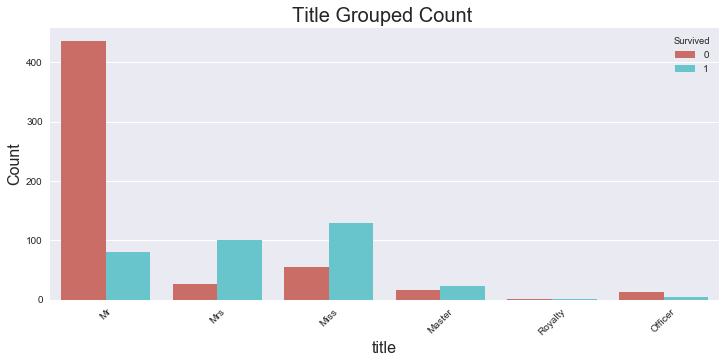

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(x='Title', data = df_train , palette='hls',hue = 'Survived')


plt.xlabel('title',fontsize = 16)
plt.ylabel('Count',fontsize=16)
plt.title('Title Grouped Count ',fontsize=20)
plt.xticks(rotation = 45)
plt.show()

In [12]:
age_high_zero_died =  df_train[(df_train['Age']>0 ) & (df_train['Survived']==0)]
age_high_zero_surv = df_train[(df_train['Age']>0)&(df_train['Survived']==1)]

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


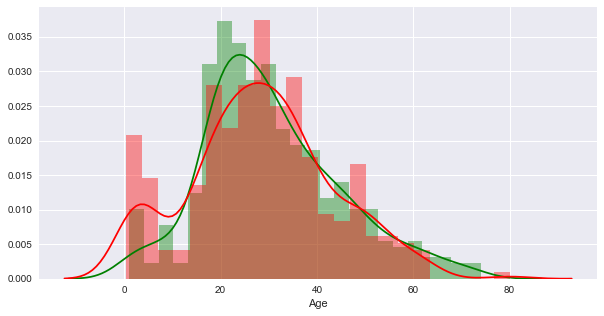

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(age_high_zero_died['Age'],bins=24 , color='g')
sns.distplot(age_high_zero_surv['Age'],bins=24 , color='r')
plt.show()

In [14]:
age_group = df_train.groupby(['Sex','Pclass','Title'])['Age']

In [15]:
age_group.head()
print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [16]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')

print(df_train["Age"].isnull().sum())

0


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


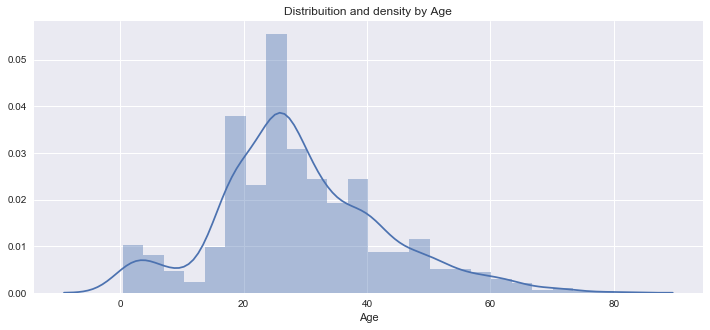

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(df_train["Age"], bins=24)
plt.title("Distribuition and density by Age")
plt.xlabel("Age")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


<Figure size 864x360 with 0 Axes>

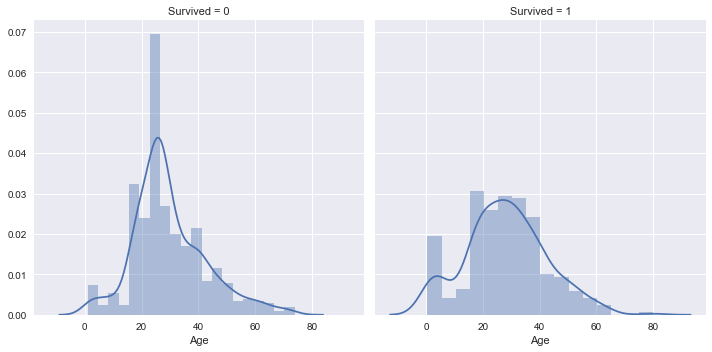

In [18]:
plt.figure(figsize=(12,5))
g = sns.FacetGrid(df_train , col = 'Survived', size = 5)
g = g.map(sns.distplot, 'Age')
plt.show()

In [19]:
interval = ( 0,5,12,18,25,35,60,120)
cats = ['babies','Children' ,'Teen' ,'Student','Young','Adult','Senior']

df_train['Age_cat'] = pd.cut(df_train.Age , interval , labels=cats)
df_train['Age_cat'].head()

0    Student
1      Adult
2      Young
3      Young
4      Young
Name: Age_cat, dtype: category
Categories (7, object): [Adult < Children < Senior < Student < Teen < Young < babies]

In [20]:
interval = (0, 5, 12, 18, 25, 35, 60, 120)
cats = ['babies', 'Children', 'Teen', 'Student', 'Young', 'Adult', 'Senior']

df_test["Age_cat"] = pd.cut(df_test.Age, interval, labels=cats)

In [21]:
print(pd.crosstab(df_train.Age_cat, df_train.Survived))

Survived    0   1
Age_cat          
Adult     133  91
Children   16   9
Senior     17   5
Student   108  56
Teen       54  49
Young     206  99
babies     15  33


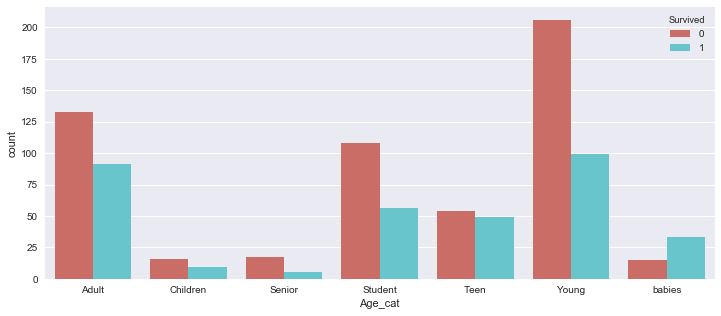

In [22]:
plt.figure(figsize=(12,5))
sns.countplot('Age_cat', data = df_train , hue = 'Survived',palette='hls')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


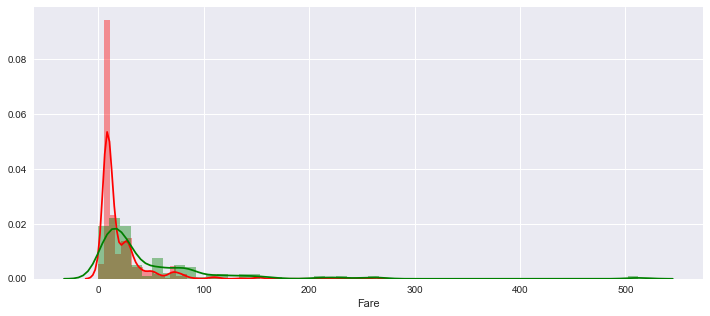

In [23]:
plt.figure(figsize=(12,5))
sns.distplot(df_train[df_train.Survived==0]['Fare'],bins=50 , color='r')
sns.distplot(df_train[df_train.Survived==1]['Fare'],bins=50,color='g' )
plt.show()

In [24]:
df_train.Fare = df_train.Fare.fillna(-0.5)

In [25]:
quant = ( -1 , 0 , 8 , 15 , 31 , 600 )
label_quants = ['NoInf' , 'quant_1' , 'quant_2', 'quant_3','quant_4']

df_train['Fare_cat'] = pd.cut(df_train.Fare , quant , labels = label_quants)
print(pd.crosstab(df_train.Fare_cat,df_train.Survived))

Survived    0    1
Fare_cat          
NoInf      14    1
quant_1   175   51
quant_2   155   62
quant_3   112   99
quant_4    93  129


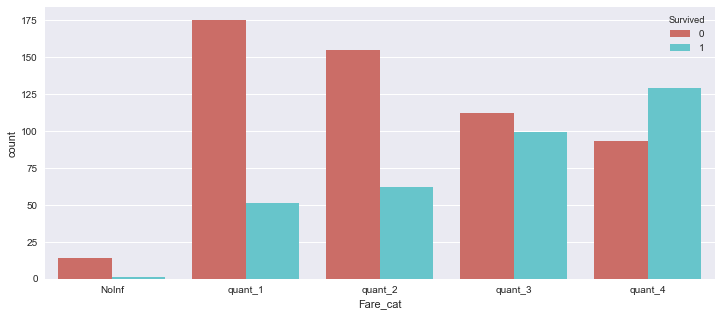

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x="Fare_cat", hue="Survived", data=df_train, palette="hls")
plt.show()

In [27]:
df_test.Fare = df_test.Fare.fillna(-0.5)
quant = (-1 , 0 , 8 , 15 ,31 , 1000)

label_quants = ['NoInf', 'quart_1', 'quart_2', 'quart_3', 'quart_4']

df_test["Fare_cat"] = pd.cut(df_test.Fare, quant, labels=label_quants)


In [28]:
del df_train['Fare']
del df_train['Ticket']
del df_train['Age']
del df_train['Cabin']
del df_train['Name']


del df_test['Fare']
del df_test['Ticket']
del df_test['Age']
del df_test['Cabin']
del df_test['Name']

In [29]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Title,Age_cat,Fare_cat
0,1,0,3,male,1,0,S,Mr,Student,quant_1
1,2,1,1,female,1,0,C,Mrs,Adult,quant_4
2,3,1,3,female,0,0,S,Miss,Young,quant_1
3,4,1,1,female,1,0,S,Mrs,Young,quant_4
4,5,0,3,male,0,0,S,Mr,Young,quant_2


In [30]:
print(df_train.groupby('Survived')['PassengerId'].count())

Survived
0    549
1    342
Name: PassengerId, dtype: int64


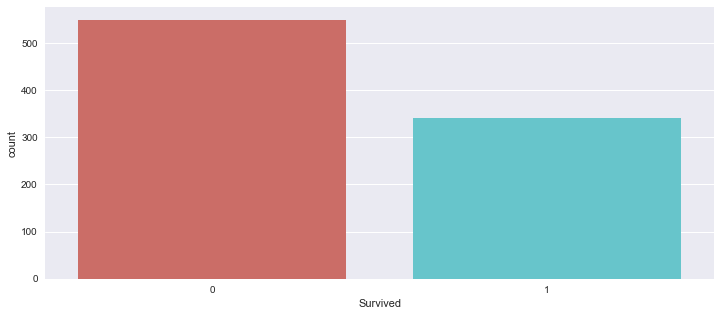

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x='Survived', data= df_train , palette='hls')
plt.show()

In [32]:
print(pd.crosstab(df_train.Survived , df_train.Sex))

Sex       female  male
Survived              
0             81   468
1            233   109


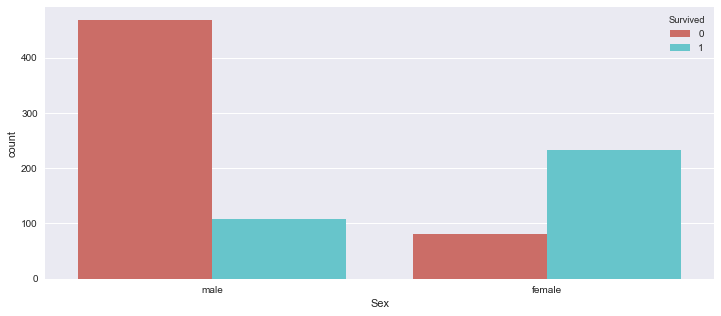

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(x='Sex', data=df_train , hue='Survived', palette='hls')
plt.show()

In [34]:
print(pd.crosstab(df_train.Pclass , df_train.Embarked))

Embarked   C   Q    S
Pclass               
1         85   2  127
2         17   3  164
3         66  72  353


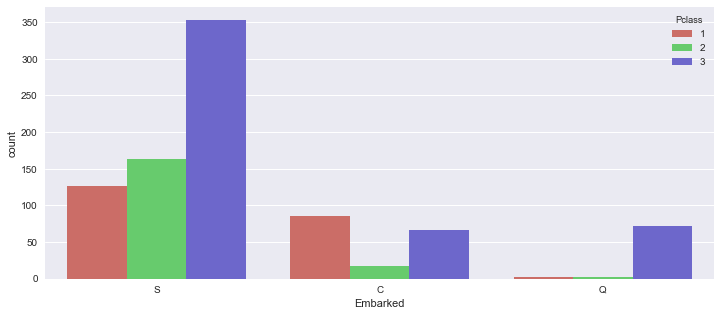

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(x='Embarked' , data= df_train , hue = 'Pclass', palette='hls')
plt.show()

In [36]:
df_train['Embarked'] =df_train['Embarked'].fillna('S')

In [37]:
pd.crosstab(df_train['Survived'] , df_train['Embarked'])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,219


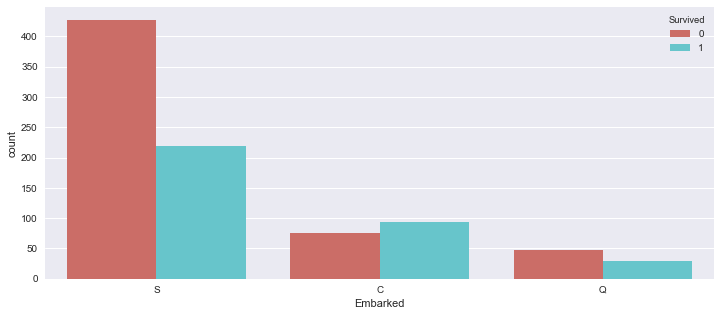

In [38]:
plt.figure(figsize=(12,5))
sns.countplot(x='Embarked', data=df_train, hue='Survived', palette='hls' 
    )
plt.show()

In [39]:
pd.crosstab(df_train['Survived'] , df_train['Pclass']  )

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


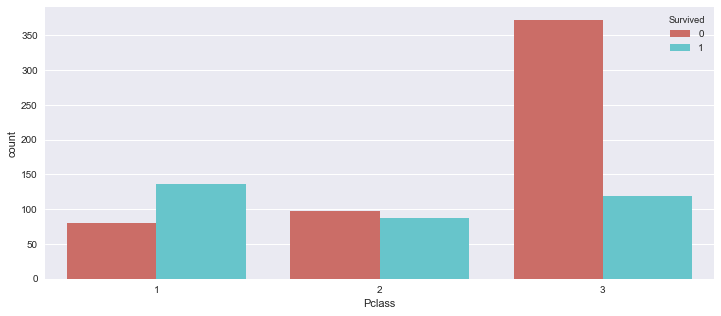

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x='Pclass', data= df_train , hue = 'Survived' , palette='hls')
plt.show()

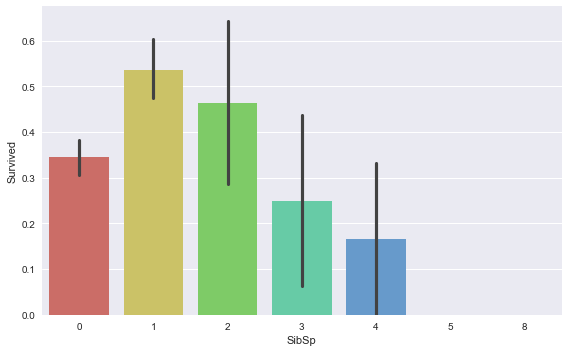

In [41]:
g = sns.factorplot(x = 'SibSp' , y = 'Survived', data = df_train,
                  kind = 'bar' , size=5, aspect = 1.6 , palette = 'hls'
                  )
plt.show()


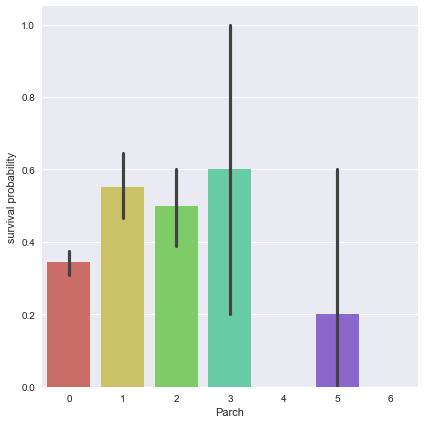

In [42]:
g  = sns.factorplot(x="Parch",y="Survived",data=df_train, kind="bar", size = 6,palette = "hls")
g = g.set_ylabels("survival probability")

In [43]:
df_train["FSize"] = df_train["Parch"] + df_train["SibSp"] + 1

df_test["FSize"] = df_test["Parch"] + df_test["SibSp"] + 1

In [44]:
print(pd.crosstab(df_train.FSize, df_train.Survived))

Survived    0    1
FSize             
1         374  163
2          72   89
3          43   59
4           8   21
5          12    3
6          19    3
7           8    4
8           6    0
11          7    0


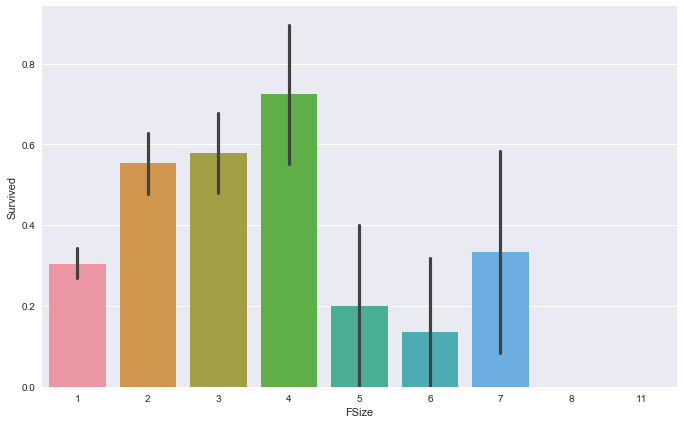

In [45]:
sns.factorplot(x="FSize",y="Survived", data=df_train, kind="bar",size=6, aspect=1.6)
plt.show()

In [46]:
del df_train["SibSp"]
del df_train["Parch"]

del df_test["SibSp"]
del df_test["Parch"]


In [47]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Embarked,Title,Age_cat,Fare_cat,FSize
0,1,0,3,male,S,Mr,Student,quant_1,2
1,2,1,1,female,C,Mrs,Adult,quant_4,2
2,3,1,3,female,S,Miss,Young,quant_1,1
3,4,1,1,female,S,Mrs,Young,quant_4,2
4,5,0,3,male,S,Mr,Young,quant_2,1


In [48]:
df_train = pd.get_dummies(df_train, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                          prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

df_test = pd.get_dummies(df_test, columns=["Sex","Embarked","Age_cat","Fare_cat","Title"],\
                         prefix=["Sex","Emb","Age","Fare","Prefix"], drop_first=True)

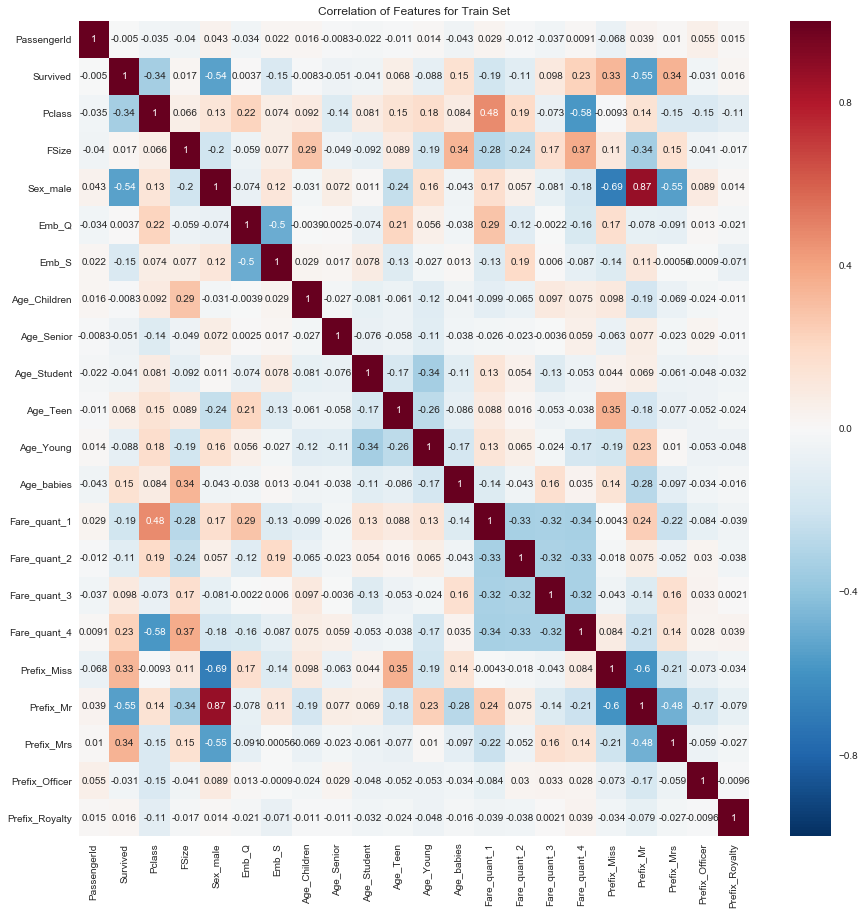

In [49]:
plt.figure(figsize=(15,15))
plt.title('Correlation of Features for Train Set')
sns.heatmap(df_train.astype(float).corr(),vmax=1.0,  annot=True)
plt.show()

In [50]:
df_train.shape

(891, 22)

In [51]:
train = df_train.drop(["Survived","PassengerId"],axis=1)
train_ = df_train["Survived"]

test_ = df_test.drop(["PassengerId"],axis=1)

X_train = train.values
y_train = train_.values

X_test = test_.values
X_test = X_test.astype(np.float64, copy=False)

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [53]:
import keras 
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout
from keras.optimizers import SGD
import graphviz

Using TensorFlow backend.


In [54]:
model = Sequential()

model.add(Dense(18,  activation='relu',  input_dim=20,kernel_initializer='uniform'))
model.add(Dropout(0.50))


model.add(Dense(12,activation='relu', kernel_initializer='uniform'))
model.add(Dropout(0.50))


model.add(Dense(1,activation='sigmoid', kernel_initializer='uniform'))


model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 18)                378       
_________________________________________________________________
dropout_1 (Dropout)          (None, 18)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                228       
_________________________________________________________________
dropout_2 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 619
Trainable params: 619
Non-trainable params: 0
_________________________________________________________________


In [59]:
sgd = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train,  batch_size = 60, epochs = 30, verbose=2)

Epoch 1/30
 - 0s - loss: 0.3822 - acc: 0.8530
Epoch 2/30
 - 0s - loss: 0.4094 - acc: 0.8418
Epoch 3/30
 - 0s - loss: 0.4095 - acc: 0.8249
Epoch 4/30
 - 0s - loss: 0.4061 - acc: 0.8451
Epoch 5/30
 - 0s - loss: 0.4096 - acc: 0.8418
Epoch 6/30
 - 0s - loss: 0.4076 - acc: 0.8429
Epoch 7/30
 - 0s - loss: 0.3842 - acc: 0.8451
Epoch 8/30
 - 0s - loss: 0.3921 - acc: 0.8440
Epoch 9/30
 - 0s - loss: 0.3936 - acc: 0.8485
Epoch 10/30
 - 0s - loss: 0.3942 - acc: 0.8541
Epoch 11/30
 - 0s - loss: 0.3701 - acc: 0.8451
Epoch 12/30
 - 0s - loss: 0.4180 - acc: 0.8294
Epoch 13/30
 - 0s - loss: 0.4125 - acc: 0.8272
Epoch 14/30
 - 0s - loss: 0.3957 - acc: 0.8395
Epoch 15/30
 - 0s - loss: 0.3913 - acc: 0.8350
Epoch 16/30
 - 0s - loss: 0.3924 - acc: 0.8395
Epoch 17/30
 - 0s - loss: 0.3961 - acc: 0.8406
Epoch 18/30
 - 0s - loss: 0.3770 - acc: 0.8384
Epoch 19/30
 - 0s - loss: 0.3980 - acc: 0.8406
Epoch 20/30
 - 0s - loss: 0.3916 - acc: 0.8418
Epoch 21/30
 - 0s - loss: 0.3913 - acc: 0.8395
Epoch 22/30
 - 0s - lo

In [60]:
scores = model.evaluate(X_train, y_train, batch_size=30)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

891/891 [==============================] - 0s 101us/step
acc: 86.98%


In [61]:
history = model.fit(X_train, y_train, validation_split=0.20, epochs=180, batch_size=10, verbose=0)
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


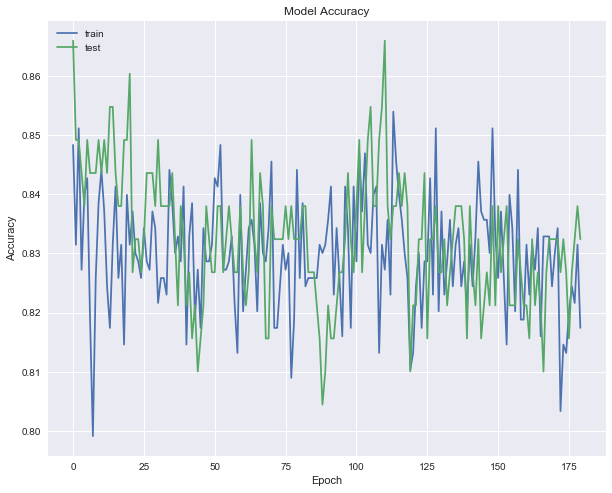

In [62]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

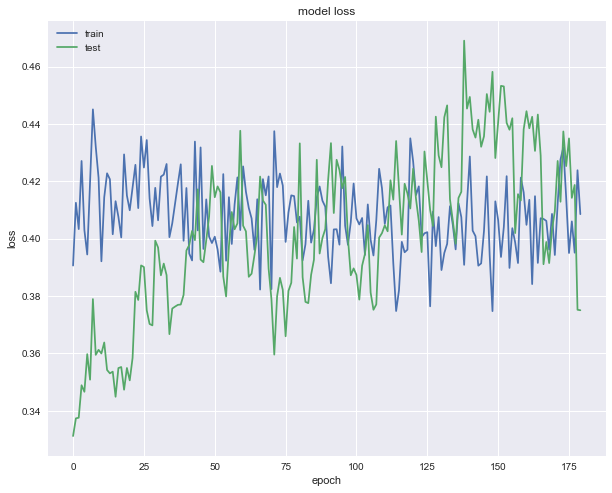

In [63]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [64]:
y_pred = model.predict(X_test)

In [66]:
y_final = (y_pred > 0.5).astype(int).reshape(X_test.shape[0])

output = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_final})

output.to_csv('prediction-ann.csv', index=False)